In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.dummy import DummyRegressor

In [97]:
def categorie_bmi(bmi):
    if bmi < 18.5:
        return 'faible'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'surpoids'
    else:
        return 'obesité'

In [99]:
df= pd.read_csv('brief_assurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [100]:
df['categorie_bmi'] = df['bmi'].apply(categorie_bmi)

In [101]:
df = df.drop('bmi',axis=1)

In [102]:
df

,age,sex,children,smoker,region,charges,categorie_bmi
0,19,female,0,yes,southwest,16884.92400,surpoids
1,18,male,1,no,southeast,1725.55230,obesité
2,28,male,3,no,southeast,4449.46200,obesité
3,33,male,0,no,northwest,21984.47061,normal
4,32,male,0,no,northwest,3866.85520,surpoids
...,...,...,...,...,...,...,...
1333,50,male,3,no,northwest,10600.54830,obesité
1334,18,female,0,no,northeast,2205.98080,obesité
1335,18,female,0,no,southeast,1629.83350,obesité
1336,21,female,0,no,southwest,2007.94500,surpoids


In [103]:
X=df.drop('charges',axis=1)
y=df['charges']
X_train,X_test,y_train,y_test = train_test_split(X, y,shuffle=True, test_size=0.15,random_state=42, stratify=X[['smoker','region','sex']])

In [104]:
X_train,X_validation,y_train,y_validation = train_test_split(X_train, y_train,shuffle=True, test_size=0.2,random_state=42, stratify=None)

In [105]:
dummy_regr = DummyRegressor(strategy="mean")
X_train.head()
dummy_regr.fit(X_train, y_train)
dummy_regr.score(X_test, y_test)

-0.013743454770904995

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   children       1338 non-null   int64  
 3   smoker         1338 non-null   object 
 4   region         1338 non-null   object 
 5   charges        1338 non-null   float64
 6   categorie_bmi  1338 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 73.3+ KB


In [107]:
X=df.drop('charges',axis=1)
y=df['charges']
X_train,X_test,y_train,y_test = train_test_split(X, y,shuffle=True, test_size=0.15,random_state=42, stratify=X[['smoker','region','sex']])

In [108]:
quantitative_col = list(X.select_dtypes(include=[float,int]).columns)
categoriel_col = list(X.select_dtypes(include=[object]).columns)
quantitative_pipeline = make_pipeline(StandardScaler(),PolynomialFeatures())
preprocessing=ColumnTransformer([("one_hot",OneHotEncoder(drop='if_binary'),categoriel_col),("scaling",quantitative_pipeline,quantitative_col)])

In [109]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())

my_pipe_ridge = make_pipeline(preprocessing, Ridge())

my_pipe_lasso = make_pipeline(preprocessing, Lasso())

my_pipe_elasticnet= make_pipeline(preprocessing, ElasticNet())

In [110]:
cross_val_score(my_pipe_lr,X_train,y_train,cv=5).mean()

0.7477773780693562

In [111]:
print(cross_val_score(my_pipe_lr,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_ridge,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_lasso,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_elasticnet,X_train,y_train,cv=5).mean())

0.7477773780693562
0.7471672796502915
0.747196471177675
0.3730583399644059


In [112]:
cross_val_score(my_pipe_ridge,X_train,y_train,cv=5).mean()

0.7471672796502915

In [113]:
cross_val_score(my_pipe_lasso,X_train,y_train,cv=5).mean()

0.747196471177675

In [114]:
cross_val_score(my_pipe_elasticnet,X_train,y_train,cv=5).mean()

0.3730583399644059

In [115]:
param_grid={'ridge__alpha':np.arange(1,50)/10
            }
search_ridge = GridSearchCV(my_pipe_ridge, param_grid,cv=5)

In [116]:
my_pipe_ridge.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('one_hot', OneHotEncoder(drop='if_binary'),
                                    ['sex', 'smoker', 'region', 'categorie_bmi']),
                                   ('scaling',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures())]),
                                    ['age', 'children'])])),
  ('ridge', Ridge())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('one_hot', OneHotEncoder(drop='if_binary'),
                                  ['sex', 'smoker', 'region', 'categorie_bmi']),
                                 ('scaling',
                                  Pipeline(steps=[('standardscaler',
                                               

In [117]:
search_ridge.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region',
                                                                          'categorie_bmi']),
                                                                        ('scaling',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['age',
                                                                          'children'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [118]:
search_ridge.best_score_

0.7471750620258847

In [119]:
search_ridge.best_params_

{'ridge__alpha': 1.5}

In [120]:
param_grid={'lasso__alpha':np.arange(1,50)/10
            }
search_lasso = GridSearchCV(my_pipe_lasso, param_grid,cv=5)
search_lasso.fit(X_train,y_train)

/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.145e+09, tolerance: 1.394e+07
  model = cd_fast.enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.276e+09, tolerance: 1.421e+07
  model = cd_fast.enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region',
                                                                          'categorie_bmi']),
                                                                        ('scaling',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['age',
                                                                          'children'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [121]:
search_lasso.best_score_

0.747556574352045

In [122]:
search_lasso.best_params_

{'lasso__alpha': 4.9}

In [123]:
search_elasticnet=GridSearchCV(my_pipe_elasticnet,param_grid,cv=5)

In [124]:
my_pipe_elasticnet.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('one_hot', OneHotEncoder(drop='if_binary'),
                                    ['sex', 'smoker', 'region', 'categorie_bmi']),
                                   ('scaling',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures())]),
                                    ['age', 'children'])])),
  ('elasticnet', ElasticNet())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('one_hot', OneHotEncoder(drop='if_binary'),
                                  ['sex', 'smoker', 'region', 'categorie_bmi']),
                                 ('scaling',
                                  Pipeline(steps=[('standardscaler',
                                     

In [125]:
param={'elasticnet__alpha':np.arange(1,50)/10,
'elasticnet__l1_ratio':np.arange(1,50)/10
            }

search_elasticnet = GridSearchCV(my_pipe_elasticnet,param,cv=5)
search_elasticnet.fit(X_train,y_train)

/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.145e+09, tolerance: 1.394e+07
  model = cd_fast.enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.276e+09, tolerance: 1.421e+07
  model = cd_fast.enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region',
                                                                          'categorie_bmi']),
                                                                        ('scaling',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['age',
                                                                          'children'])])),
                                       ('elasticnet', ElasticNet())]),
             param...
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'elasticnet__l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [126]:
search_lasso.best_score_

0.747556574352045

In [127]:
search_elasticnet.best_params_

{'elasticnet__alpha': 4.9, 'elasticnet__l1_ratio': 1.0}

In [128]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())

my_pipe_ridge = make_pipeline(preprocessing, Ridge(alpha=1.5))

my_pipe_lasso = make_pipeline(preprocessing, Lasso(alpha=4.9))

my_pipe_elasticnet= make_pipeline(preprocessing, ElasticNet(alpha=4.9 ,l1_ratio = 1.0))

In [129]:
print(cross_val_score(my_pipe_lr,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_ridge,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_lasso,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_elasticnet,X_train,y_train,cv=5).mean())

0.7477773780693562
0.7471750620258847
0.747556574352045
0.747556574352045


In [130]:

my_pipe_lr.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex', 'smoker', 'region',
                                                   'categorie_bmi']),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['age', 'children'])])),
                ('linearregression', LinearRegression())])

In [131]:
my_pipe_lr.score(X_test,y_test)

0.765473729785221

In [132]:
y_pred = my_pipe_lr.predict(X)
residual =(y_pred-y).abs().sort_values(ascending=False,)
residual

1300    28928.87309
543     26682.42801
577     25483.07448
219     24553.76784
819     23839.40209
           ...     
791        20.40700
548        18.37795
606         9.37975
125         6.60085
101         2.91060
Name: charges, Length: 1338, dtype: float64

In [133]:
residual.info()

<class 'pandas.core.series.Series'>
Int64Index: 1338 entries, 1300 to 101
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 20.9 KB


In [134]:
to_drop=residual[residual>15000].index

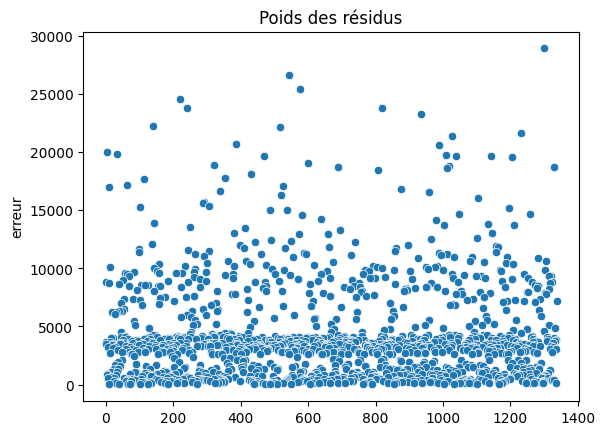

In [135]:
sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [136]:
df[df.index.isin(to_drop)].describe()

,age,children,charges
count,45.000000,45.000000,45.000000
mean,38.733333,1.133333,31009.909164
std,14.365995,1.140175,12313.253856
min,18.000000,0.000000,18838.703660
25%,25.000000,0.000000,23241.474530
50%,40.000000,1.000000,27117.993780
75%,52.000000,2.000000,32108.662820
max,64.000000,4.000000,63770.428010


In [137]:
to_drop

Int64Index([1300,  543,  577,  219,  819,  242,  936,  140,  516, 1230, 1027,
             387,  987,    3,   34, 1008, 1039, 1142,  468, 1206,  599,  321,
            1019,  688, 1328, 1012,  806,  430,  355,  115,   62,  526,    9,
             876,  340,  959,  520, 1104,  291,  289,  306,  102, 1195,  488,
             539],
           dtype='int64')

In [138]:
df_cleaned=df.drop(to_drop)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1293 non-null   int64  
 1   sex            1293 non-null   object 
 2   children       1293 non-null   int64  
 3   smoker         1293 non-null   object 
 4   region         1293 non-null   object 
 5   charges        1293 non-null   float64
 6   categorie_bmi  1293 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 80.8+ KB


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   children       1338 non-null   int64  
 3   smoker         1338 non-null   object 
 4   region         1338 non-null   object 
 5   charges        1338 non-null   float64
 6   categorie_bmi  1338 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 73.3+ KB


In [140]:
X=df_cleaned.drop('charges',axis=1)
y=df_cleaned['charges']
X_train,X_test,y_train,y_test = train_test_split(X, y,shuffle=True, test_size=0.15,random_state=42, stratify=X[['smoker','region','sex']])

In [141]:

my_pipe_lr.fit(X_train, y_train)
my_pipe_lr.score(X_test, y_test)

0.8348307183199413

In [143]:
X_train

,age,sex,children,smoker,region,categorie_bmi
491,61,female,0,no,southeast,surpoids
356,46,male,3,no,southeast,obesité
439,26,male,0,no,northeast,surpoids
528,46,male,1,no,northeast,obesité
1097,22,male,0,no,southeast,obesité
...,...,...,...,...,...,...
1040,35,female,0,yes,northwest,surpoids
678,56,male,3,no,southwest,obesité
926,19,female,2,no,southwest,normal
827,36,male,1,yes,northeast,surpoids


meilleur score sans determine parametre alpha 0.765063644178095

In [142]:
import pickle 
pickle_out = open("my_pipe_ridge.pkl", "wb") 
pickle.dump(my_pipe_lr, pickle_out) 
pickle_out.close()